# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os

%matplotlib inline

In [2]:
dataset = get_dataset("/media/ssd_fast/work/udacity/self_driving_cars/data/processed/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/media/ssd_fast/work/udacity/self_driving_cars/data/processed/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/media/ssd_fast/work/udacity/self_driving_cars/data/processed/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 100
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH

## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # mapping color to class labels
    color_map = {1: 'red', 2: 'blue', 4: 'green'}
    
    # create subplots to display images
    fig, ax = plt.subplots() 
    im = batch["image"].numpy()
    ax.imshow(im)
    
    # drawing bounding boxes and adding color to different class labels
    for coord, label in zip(batch["groundtruth_boxes"].numpy(), batch["groundtruth_classes"].numpy()):
        xy = (coord[1]*im.shape[1], coord[0]*im.shape[0])
        width = (coord[3] - coord[1])*im.shape[1]
        height = (coord[2] - coord[0])*im.shape[0]
        rec = patches.Rectangle(xy, width, height, linewidth=1, edgecolor=color_map[label], facecolor='none')
        ax.add_patch(rec)
    plt.axis("off")

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

<Figure size 720x720 with 0 Axes>

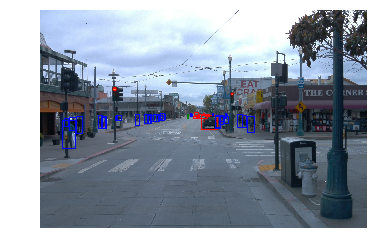

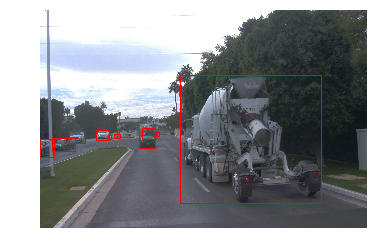

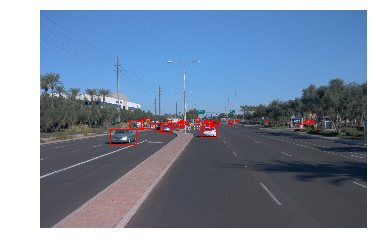

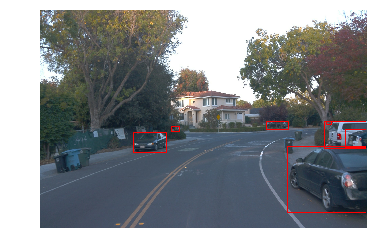

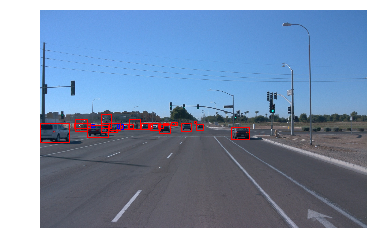

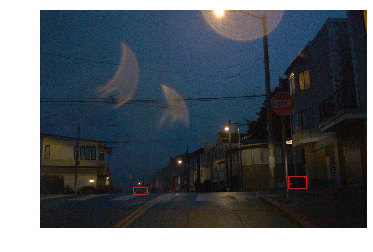

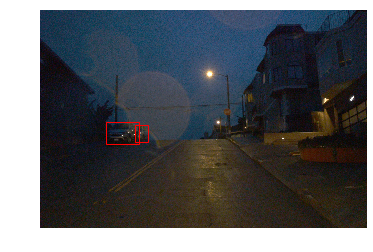

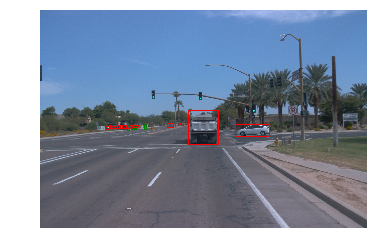

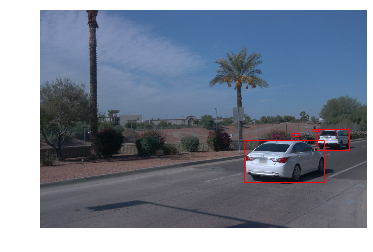

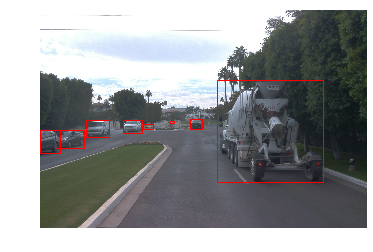

In [4]:
# Display 10 random images in dataset
plt.figure(figsize=(10, 10))
for i in range(10):
    for batch in dataset.shuffle(75, reshuffle_each_iteration=True).take(1):
        display_instances(batch)
plt.show()

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [5]:
for batches in dataset.take(1):
        for labels, value in batches.items():
            print("{:20s}: {}".format(labels, value.numpy()))

image               : [[[147 171 217]
  [149 173 219]
  [150 174 220]
  ...
  [111 129 153]
  [110 128 150]
  [110 128 150]]

 [[147 171 217]
  [148 172 218]
  [149 173 219]
  ...
  [112 130 154]
  [112 130 152]
  [112 130 152]]

 [[149 173 219]
  [149 173 219]
  [148 172 218]
  ...
  [113 129 154]
  [113 129 154]
  [113 129 154]]

 ...

 [[ 66  73  91]
  [ 65  72  90]
  [ 65  72  88]
  ...
  [ 51  68  76]
  [ 51  68  76]
  [ 50  67  75]]

 [[ 68  75  93]
  [ 69  76  94]
  [ 70  77  95]
  ...
  [ 54  71  79]
  [ 53  70  78]
  [ 51  68  76]]

 [[ 68  75  93]
  [ 70  77  95]
  [ 72  79  97]
  ...
  [ 57  74  82]
  [ 55  72  80]
  [ 53  70  78]]]
source_id           : b'segment-1083056852838271990_4080_000_4100_000_with_camera_labels_21.tfrecord'
key                 : b''
filename            : b'segment-1083056852838271990_4080_000_4100_000_with_camera_labels_21.tfrecord'
groundtruth_image_confidences: []
groundtruth_verified_neg_classes: []
groundtruth_not_exhaustive_classes: []
groundtr

In [6]:
# initialize each label count to 0
images_sampled = 32768
dataframe = {'batch_number': [], 'object': [], 'count': []}
batch_number = 1
for batches in dataset.take(images_sampled):
    object_count = {1: 0, 2 : 0, 4: 0 }
    
    for l in batches["groundtruth_classes"].numpy():
        object_count[l] += 1
        
    for l in object_count.keys():
        dataframe['batch_number'].append(batch_number)
        dataframe['object'].append(l)
        dataframe['count'].append(object_count[l])
        
    batch_number += 1

In [7]:
import pandas as pd

images_df = pd.DataFrame(dataframe)
object_to_name = {1: 'car', 2 : 'pedestrian', 4: 'cyclist'}
images_df['object_class'] = images_df['object'].apply(lambda x : object_to_name[x])
images_df.head()

,batch_number,object,count,object_class
0,1,1,30,car
1,1,2,31,pedestrian
2,1,4,0,cyclist
3,2,1,4,car
4,2,2,0,pedestrian


In [8]:
images_sampled

32768

[Text(0, 0.5, 'Number of Classified Objects'),
 Text(0.5, 0, 'Classes'),
 Text(0.5, 1.0, 'Distribution of Classes')]

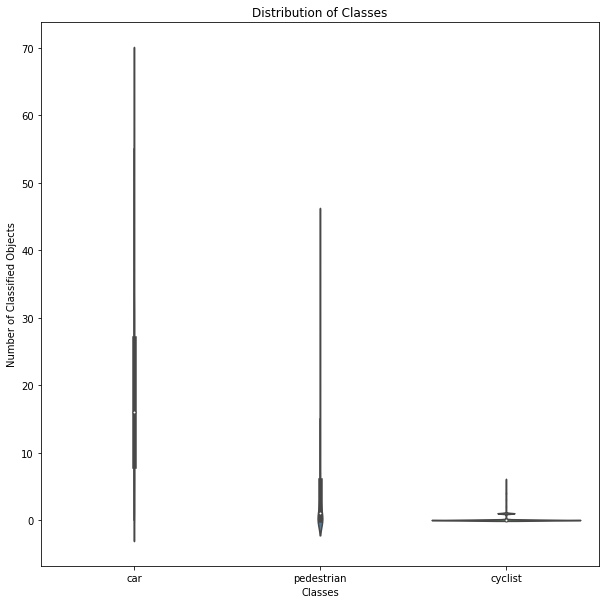

In [9]:
import seaborn as sns
sns.set_palette("Set1", 8, .75)

plt.figure(figsize=(10, 10))
ax = sns.violinplot(x="object_class", y="count", data=images_df)
ax.set(xlabel='Classes', ylabel='Number of Classified Objects', title='Distribution of Classes')

[Text(0, 0.5, 'Number of Classified Objects'),
 Text(0.5, 0, 'Classes'),
 Text(0.5, 1.0, 'Distribution of Classes')]

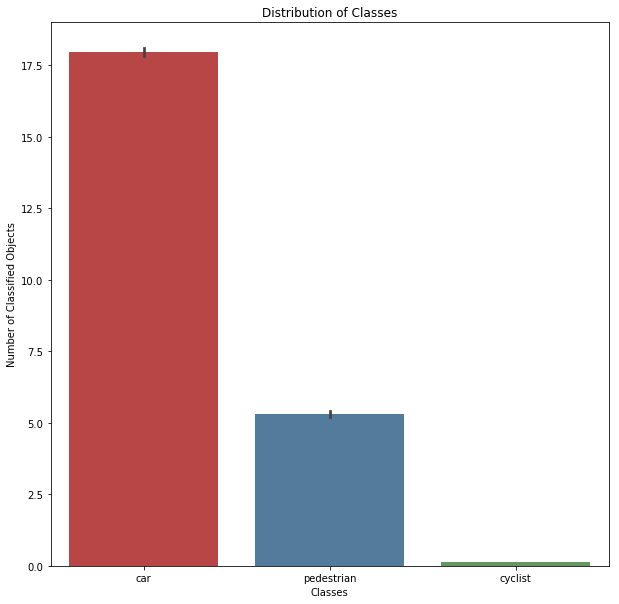

In [10]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='object_class', y="count", data=images_df)
ax.set(xlabel='Classes', ylabel='Number of Classified Objects', title='Distribution of Classes')

/home/andre/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/andre/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/andre/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Number of Cars'),
 Text(0.5, 1.0, 'Distribution of Cars in Images')]

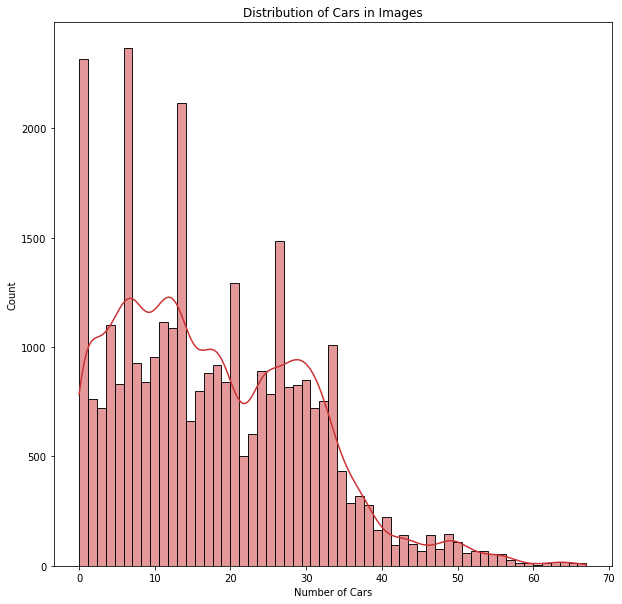

In [11]:
plt.figure(figsize=(10, 10))
ax_cars = sns.histplot(data=images_df[images_df['object_class'] == 'car'], x='count', kde=True)
ax_cars.set(xlabel='Number of Cars', ylabel='Count', title='Distribution of Cars in Images')

/home/andre/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/andre/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/andre/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Number of Pedestrians'),
 Text(0.5, 1.0, 'Distribution of Pedestrians in Images')]

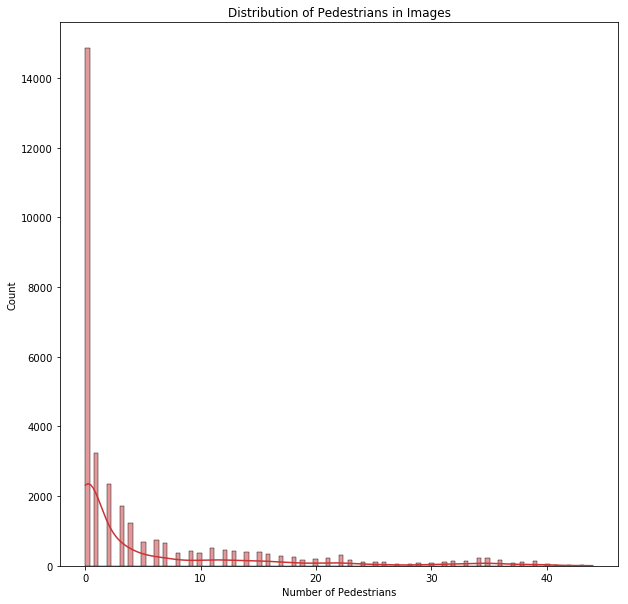

In [12]:
plt.figure(figsize=(10, 10))
ax_cars = sns.histplot(data=images_df[images_df['object_class'] == 'pedestrian'], x='count', kde=True)
ax_cars.set(xlabel='Number of Pedestrians', ylabel='Count', title='Distribution of Pedestrians in Images')

/home/andre/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/andre/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/andre/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Number of Cyclists'),
 Text(0.5, 1.0, 'Distribution of Cyclists in Images')]

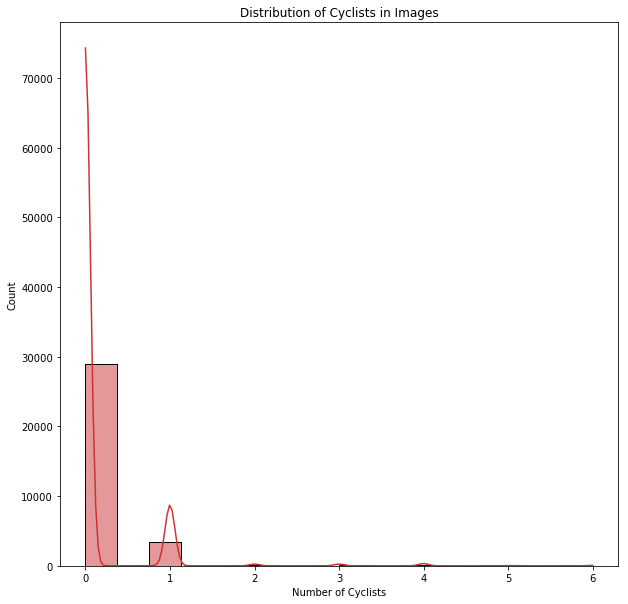

In [13]:
plt.figure(figsize=(10, 10))
ax_cars = sns.histplot(data=images_df[images_df['object_class'] == 'cyclist'], x ='count', kde=True)
ax_cars.set(xlabel='Number of Cyclists', ylabel='Count',  title='Distribution of Cyclists in Images')

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Number of Objects from Class'),
 Text(0.5, 1.0, 'Distribution of Classes in Images')]

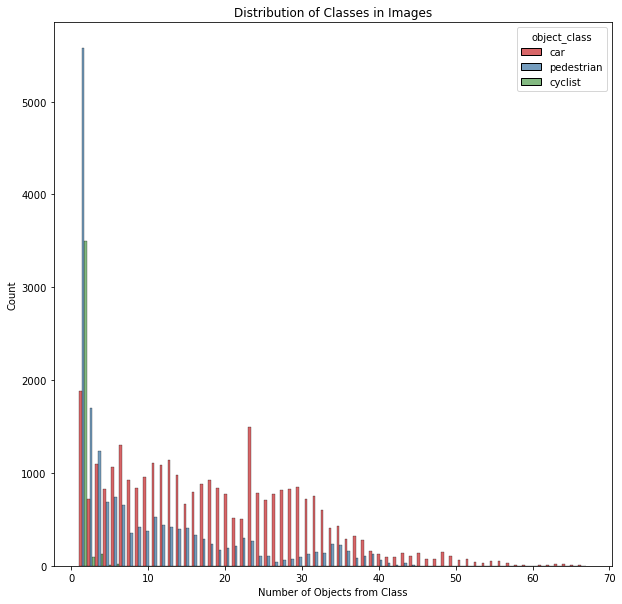

In [14]:
plt.figure(figsize=(10, 10))
ax_cars = sns.histplot(data=images_df[images_df['count'] > 0], x='count', hue='object_class', multiple="dodge")
ax_cars.set(xlabel='Number of Objects from Class', ylabel='Count', title='Distribution of Classes in Images')

In [28]:
images_df.pivot(index=['batch_number'], columns=['object_class', 'object']).describe()

count                            
object_class           car    pedestrian       cyclist
object                   1             2             4
count         32768.000000  32768.000000  32768.000000
mean             17.967621      5.306702      0.139923
std              12.443622      9.033306      0.467501
min               0.000000      0.000000      0.000000
25%               8.000000      0.000000      0.000000
50%              16.000000      1.000000      0.000000
75%              27.000000      6.000000      0.000000
max              67.000000     44.000000      6.000000

In [21]:
cyclists_df = images_df[images_df['object_class'] == 'cyclist']
cyclists_df.head()

,batch_number,object,count,object_class
2,1,4,0,cyclist
5,2,4,0,cyclist
8,3,4,0,cyclist
11,4,4,0,cyclist
14,5,4,0,cyclist


In [22]:
cyclists_df[cyclists_df['count'] > 0]

,batch_number,object,count,object_class
83,28,4,1,cyclist
125,42,4,1,cyclist
170,57,4,1,cyclist
200,67,4,1,cyclist
209,70,4,1,cyclist
...,...,...,...,...
98216,32739,4,1,cyclist
98228,32743,4,1,cyclist
98264,32755,4,1,cyclist
98294,32765,4,1,cyclist


In [24]:
cyclists_df.describe()

,batch_number,object,count
count,32768.000000,32768.0,32768.000000
mean,16384.500000,4.0,0.139923
std,9459.451147,0.0,0.467501
min,1.000000,4.0,0.000000
25%,8192.750000,4.0,0.000000
50%,16384.500000,4.0,0.000000
75%,24576.250000,4.0,0.000000
max,32768.000000,4.0,6.000000
